# Рынок заведений общественного питания Москвы

# Содержание

Часть 1. Описание проекта.<br>

* 1. Описание исследования
* 2. Цель исследования
* 3. Изучение данных

Часть 2. Подготовка данных.<br>

* 1. Обработка дубликатов

Часть 3. Анализ данных.<br>

* 1. Исследование соотношения количества заведений различных типов
* 2. Исследование соотношения количества сетевых и не сетевых заведений
* 3. Исследование типов заведений, для которых характерно сетевое распространение
* 4. Исследование сетевых заведений по количеству мест и количеству заведений
* 5. Исследование среднего количества мест в заведении каждого типа
* 6. Исследование улиц с наибольшим количеством заведений
* 7. Исследование улиц с одним заведением
* 8. Исследование распределения количества мест для улиц с большим количеством заведений

Часть 4. Подведение итогов.<br>

* 1. Общий вывод по работе

# Часть 1. Описание проекта
# 1.1 Описание исследования
Проект по открытию небольшого оригинального кафе в Москве, в котором в качестве персонала выступают роботы. Проект многообещающий, но дорогой. 
# 1.2 Цель исследования
Анализ рынка заведений общественного питания Москвы и выдача рекомендаций по открытию кафе.
# 1.3 Изучение данных

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_colwidth', None)

# Отключение ошибок при построении графиков
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
# Чтение файла с данными
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# Функция для вывода основных данных по датасету
def all_info(data):
    print('Общая информация')
    data.info() #вывод общей информации
    display('Первые значения', data.head(5)) #вывод первых 10 значений
    display('Описание данных', data.describe()) #вывод описательной статистики по датасету
    display('Дубликаты', data.duplicated().sum()) #поиск явных дубликатов в данных
    display('Пропуски', data.isna().mean().apply('{:.2%}'.format)) #подсчет пропусков в датасете в %
    print('*'*50)
    
# Применение функции к данным
all_info(rest_data)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


'Первые значения'

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


'Описание данных'

,id,number
count,15366.0000,15366.0000
mean,119720.0669,59.5472
std,73036.1307,74.7368
min,838.0000,0.0000
25%,28524.0000,12.0000
50%,144974.5000,40.0000
75%,184262.2500,80.0000
max,223439.0000,1700.0000


'Дубликаты'

0

'Пропуски'

id             0.00%
object_name    0.00%
chain          0.00%
object_type    0.00%
address        0.00%
number         0.00%
dtype: object

**************************************************


**Вывод**

На первый взгляд в данных отстутствуют пропуски и явные дубликаты, типы данных в колонках соответствуют содержимому. В колонке `object_name` названия заведений представлены в различных регистрах, в рамках данного исследования можно опустить обработку этой колонки, т.к. мы исследуем рынок в целом, а не отдельные заведения или сети заведений. На предмет дубликатов можно проверить колонку `id`, т.к. она отвечает за уникальность заведения.

# Часть 2. Подготовка данных
# 2.1 Обработка дубликатов

In [4]:
# Удаление колонки id 
rest_data.drop('id', axis=1, inplace=True)
# Приведение значений колонки object_name к нижнему регистру
rest_data['object_name'] = [x.lower() for x in rest_data['object_name']]
# Удаление дубликатов
rest_data.drop_duplicates(inplace=True)

In [5]:
# Очистка наименований от лишних символов 
rest_data['object_name'] = (rest_data['object_name']
                            .str.replace(r'«', '', regex=True)
                            .str.replace(r'»', '', regex=True)
                            .str.replace(r'кафе', '', regex=True)
                            .str.replace(r'закусочная', '', regex=True)
                            .str.replace(r'предприятие быстрого обслуживания', '', regex=True)
                            .str.replace(r'ресторан', '', regex=True)
                            .str.replace(r'кафетерий', '', regex=True)
                            .str.replace(r'буфет', '', regex=True)
                            .str.replace(r'бар', '', regex=True)
                            .str.replace(r'магазин (отдел кулинарии)', '', regex=True))

**Вывод**

В предоставленных данных отсутствуют дубликаты.

# Часть 3. Анализ данных
# 3.1 Исследование соотношения количества заведений различных видов

,object_type,ratio
3,кафе,39.7291
8,столовая,16.9099
7,ресторан,14.9336
6,предприятие быстрого обслуживания,12.4141
0,бар,5.5952
1,буфет,3.7694
4,кафетерий,2.5849
2,закусочная,2.2773
5,магазин (отдел кулинарии),1.7865


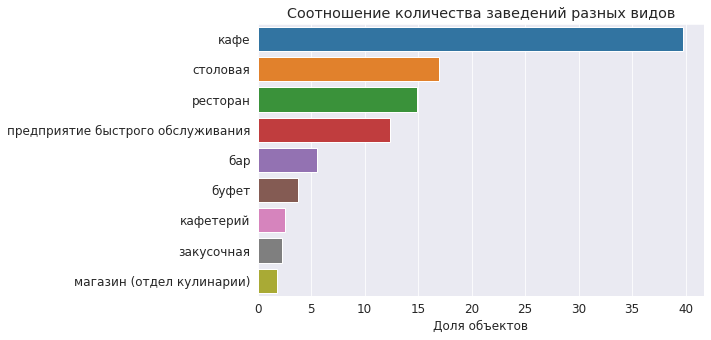

In [6]:
# Создание датафрейма, хранящего наименование заведений и их количество
rest_kind = rest_data.groupby('object_type', as_index=False)['object_name'].agg('count')
# Переименовывание колонок датафрейма
rest_kind.columns = ['object_type', 'ratio']
rest_kind['ratio'] = rest_kind['ratio']/rest_kind['ratio'].sum()*100
rest_kind.sort_values('ratio',ascending=False, inplace=True)
display(rest_kind)

# Выбор стиля графика
sns.set_style("darkgrid")
# Построение графика
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(8, 5))
sns.barplot(x='ratio', y='object_type', data=rest_kind) 
plt.ylabel('')
plt.xlabel('Доля объектов')
plt.title("Соотношение количества заведений разных видов")
plt.show()

Как видно по графику большую долю рынка занимают кафе далее следуют столовые, рестораны и предприятия быстрого обслуживания. Доля остальных заведений менее 6% каждого вида.

# 3.2 Исследование соотношения количества сетевых и не сетевых заведений

,chain,ratio
1,нет,0.8060
0,да,0.1940


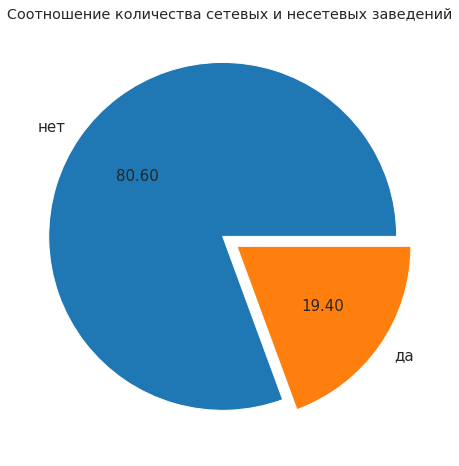

In [7]:
# Создание датафрейма, хранящего сетевые и не сетевые заведения и их количество
rest_chain = rest_data.groupby('chain', as_index=False)['object_type'].agg('count')
# Переименовывание колонок датафрейма
rest_chain.columns = ['chain', 'ratio']
rest_chain['ratio'] = rest_chain['ratio']/rest_chain['ratio'].sum()
rest_chain.sort_values('ratio',ascending=False, inplace=True)
display(rest_chain)

# Построение графика
rest_chain.plot.pie(y='ratio', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=rest_chain['chain'],
                  explode=[0.05] * 2,
                  legend=False)
plt.title("Соотношение количества сетевых и несетевых заведений")
plt.ylabel('')
plt.show()

По графику видно, что большую часть рынка ~80% занимают не сетевые заведения.

# 3.3 Исследование типов заведений, для которых характерно сетевое распространение

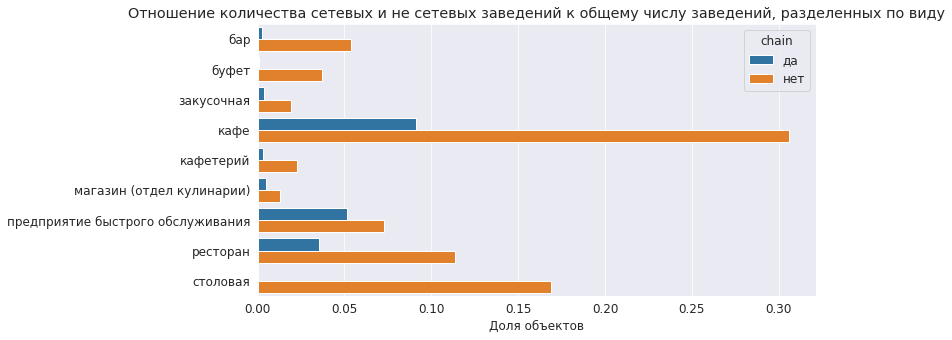

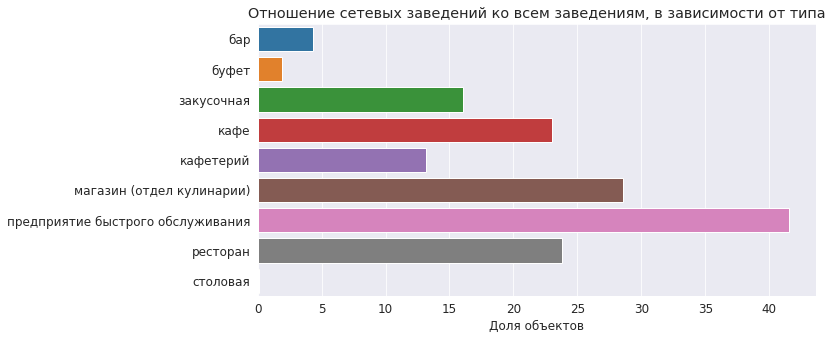

In [8]:
# Создание датафрейма, хранящего наименование заведений, сети и их количество
rest_hue = rest_data.groupby(['object_type','chain'], as_index=False)['object_name'].agg('count')
# Переименовывание колонок датафрейма
rest_hue.columns = ['object_type', 'chain', 'ratio']
rest_hue['ratio'] = rest_hue['ratio']/rest_hue['ratio'].sum()

# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(y='object_type', x='ratio', data=rest_hue, hue='chain')  
plt.ylabel('')
plt.xlabel('Доля объектов')
plt.title('Отношение количества сетевых и не сетевых заведений к общему числу заведений, разделенных по виду')
plt.show()

# Выделение сетевых заведений
rest_hue_yes = rest_hue[rest_hue['chain']=='да']['ratio'].reset_index(drop=True)
# Выделение не сетевых заведений
rest_hue_no = rest_hue[rest_hue['chain']=='нет']['ratio'].reset_index(drop=True)
# Выделение типов заведений
rest_hue_types = rest_hue['object_type'].drop_duplicates().reset_index(drop=True)

# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(y=rest_hue_types, x=rest_hue_yes/(rest_hue_no+rest_hue_yes)*100)  
plt.ylabel('')
plt.xlabel('Доля объектов')
plt.title("Отношение сетевых заведений ко всем заведениям, в зависимости от типа")
plt.show()

По графикам видно следующее:
1. Если оценивать с т.з. количества заведений, то наибольшее число сетевых заведений относятся к типу кафе.
2. Если рассматривать каждый тип заведения отдельно, то сетевое распространение характерно для предприятий быстрого обслуживания.

# 3.4 Исследование сетевых заведений по количеству мест и количеству заведений

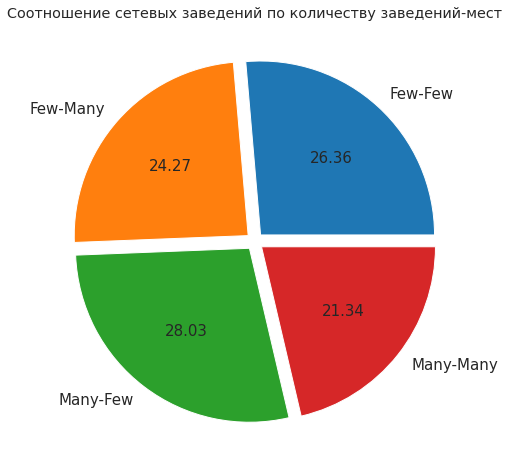

In [9]:
# Создание датафрейма, хранящего наименование сетевых заведений их количество и среднее число мест
rest_reg = (
    rest_data[rest_data['chain']=='да']
    .groupby('object_name', as_index=False)
    .agg({'number':'mean','object_type':'count'})
)
# Переименовывание колонок
rest_reg.columns = ['object_name', 'mean_number', 'count']
# Выделение сетей, где больше 1 заведений
rest_reg = rest_reg.query('count > 1').reset_index(drop=True)

# Медиана количества заведений
med_count = rest_reg['count'].median()
# Медиана числа мест
med_number = rest_reg['mean_number'].median()

# Функция распределения сетевых заведений
def character(row):
    if row['mean_number'] > med_number:
        if row['count'] > med_count:
            return 'Many-Many' # Много мест и много заведений
        else:
            return 'Many-Few'  # Много мест и мало заведений
    else:
        if row['count'] > med_count:
            return 'Few-Many'  # Мало мест и много заведений
        else:
            return 'Few-Few'   # Мало мест и мало заведений

# Применение функции
rest_reg['char'] = rest_reg.apply(character, axis=1)

final = rest_reg.groupby('char', as_index=False)['object_name'].agg('count')
final.columns = ['char', 'count']
final


# Построение графика
final.plot.pie(y='count', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=final['char'],
                  explode=[0.05] * 4,
                  legend=False)
plt.title("Соотношение сетевых заведений по количеству заведений-мест")
plt.ylabel('')
plt.show()

По графику можно сказать, что для сетевых заведений характерно большое число мест и малое число заведений (малая сеть) или малое число мест и малое число заведений.

# 3.5 Исследование среднего количества мест в заведении каждого типа

,object_type,median_number
8,столовая,103
7,ресторан,80
0,бар,35
1,буфет,32
3,кафе,30
4,кафетерий,6
6,предприятие быстрого обслуживания,6
2,закусочная,0
5,магазин (отдел кулинарии),0


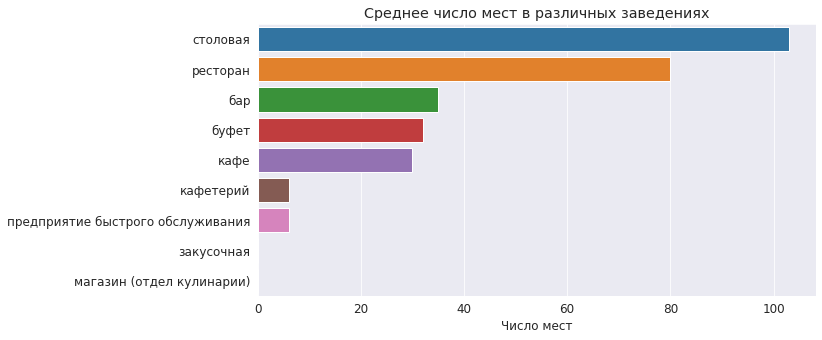

In [10]:
# Создание датафрейма, хранящего типы заведений и среднее число посадочных мест
rest_reg = rest_data.groupby('object_type', as_index=False)['number'].agg('median')
# Переименовывание колонок датафрейма
rest_reg.columns = ['object_type','median_number']
rest_reg.sort_values('median_number',ascending=False, inplace=True)
display(rest_reg)

# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(x='median_number', y='object_type', data=rest_reg)  
plt.ylabel('')
plt.xlabel('Число мест')
plt.title("Среднее число мест в различных заведениях")
plt.show()

Наибольшее среднее значение количества мест в столовых, далее идут рестораны, буфеты, бары и кафе.

# 3.6 Исследование улиц с наибольшим количеством заведений

In [11]:
# Создание колонки с названием улицы
rest_data['street'] = rest_data['address'].str.split(', ', expand=True)[1]
# Удаление лишних значений, попавшие в колонку с улицами
rest_data['street'] = rest_data[rest_data['street'].str.contains('поселение|город|дом|корпус|строение')==False]['street']
# rest_data['street'] = rest_data[rest_data['street'].str.contains('улица|бульвар|шоссе|аллея|площадь|набережная|проспект')==True]['street']
rest_data.head(5)

,object_name,chain,object_type,address,number,street
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


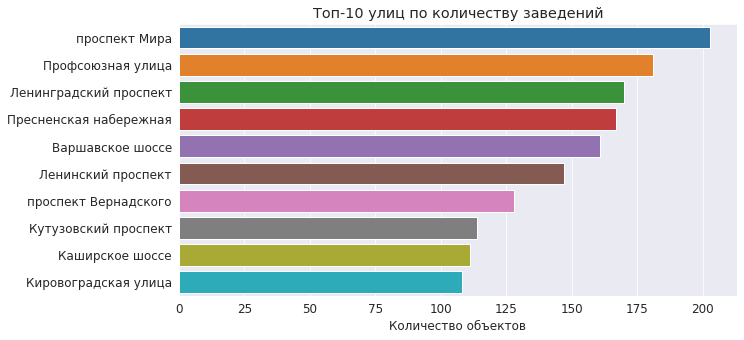

In [12]:
# Выбор улиц, на которых больше всего заведений
street_top_10 = ((rest_data.groupby('street', as_index=False)['object_type'].agg('count'))
               .sort_values('object_type', ascending=False).head(10))
street_top_10.columns = ['street','count']
# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='street', data=street_top_10)  
plt.ylabel('')
plt.xlabel('Количество объектов')
plt.title("Топ-10 улиц по количеству заведений")
plt.show()

In [13]:
from io import BytesIO
import requests
spreadsheet_id = '1aPqLMD05kc3YnAFJe33Iw926qw0uOkWAjomxXtsq01I'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
all_data = pd.read_csv(BytesIO(r.content))
# Подготовка данных, остаются только колонки с улицами, округами и районами
district_data = all_data.drop(['Name', 'global_id', 'TypeObject','IsNetObject', 'SeatsCount', 'PublicPhone', 
                               'SocialPrivileges', 'OperatingCompany', 'Longitude_WGS84', 
                               'Latitude_WGS84', 'geoData', 'ID'], axis=1)
district_data.columns = [x.lower() for x in district_data.columns.values]

# Создание колонки с названием улицы
district_data['street'] = district_data['address'].str.split(', ', expand=True)[1]
# Удаление лишних значений, попавшие в колонку с улицами
district_data['street'] = district_data[district_data['street'].str.
                                           contains('поселение|город|дом|корпус|строение')==False]['street']
# Удаление пропусков
district_data.dropna(inplace=True)
# Удаление адреса
district_data.drop('address', axis=1, inplace=True)
# Вывод результата
district_data.head(5)

,admarea,district,street
0,Северо-Восточный административный округ,Ярославский район,улица Егора Абакумова
1,Центральный административный округ,Таганский район,улица Талалихина
2,Центральный административный округ,Таганский район,Абельмановская улица
3,Северо-Восточный административный округ,район Лианозово,Абрамцевская улица
4,Северо-Восточный административный округ,район Лианозово,Угличская улица


In [14]:
# Соответствие каждой улице районов и округов, через которые проходят улицы
street_top_10 = street_top_10.merge(district_data, on='street').drop_duplicates().reset_index(drop=True)
street_top_10

,street,count,admarea,district
0,проспект Мира,203,Центральный административный округ,Мещанский район
1,проспект Мира,203,Северо-Восточный административный округ,Останкинский район
2,проспект Мира,203,Северо-Восточный административный округ,Алексеевский район
3,проспект Мира,203,Северо-Восточный административный округ,район Ростокино
4,проспект Мира,203,Северо-Восточный административный округ,район Свиблово
5,проспект Мира,203,Северо-Восточный административный округ,Ярославский район
6,Профсоюзная улица,181,Юго-Западный административный округ,Академический район
7,Профсоюзная улица,181,Юго-Западный административный округ,район Черёмушки
8,Профсоюзная улица,181,Юго-Западный административный округ,Обручевский район
9,Профсоюзная улица,181,Юго-Западный административный округ,район Коньково


<br><img width="720" src="https://avatars.mds.yandex.net/get-zen_doc/3380298/pub_605b429cc0f40244ebe343ae_605b46293bd1fd3f669f3c3f/scale_1200">

In [15]:
# Очистка данных от лишних колонок
all_data.drop(['global_id', 'IsNetObject', 'PublicPhone', 
                               'SocialPrivileges', 'OperatingCompany', 'Longitude_WGS84', 
                               'Latitude_WGS84', 'geoData'], axis=1, inplace=True)

all_data.columns = [x.lower() for x in all_data.columns.values]

# Создание колонки с названием улицы
all_data['street'] = all_data['address'].str.split(', ', expand=True)[1]
# Удаление лишних значений, попавшие в колонку с улицами
all_data['street'] = all_data[all_data['street'].str.contains('поселение|город|дом|корпус|строение')==False]['street']
all_data.dropna(inplace=True)
all_data.head(5)

,id,name,typeobject,admarea,district,address,seatscount,street
0,151635,СМЕТАНА,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,кафе,Центральный административный округ,Таганский район,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,119365,Cotto Итальянская Кофейня,кафетерий,Северо-Восточный административный округ,район Лианозово,"город Москва, Абрамцевская улица, дом 9, корпус 1",40,Абрамцевская улица
4,27429,ГБОУ «Школа № 1430 имени Героя Социалистического Труда Г.В. Кисунько» Школа № 1051,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",240,Угличская улица


In [16]:
# Выбор улиц, на которых больше всего заведений
all_street_top_10 = ((all_data.groupby(['admarea','district','street'], as_index=False)['typeobject'].agg('count'))
               .sort_values('typeobject', ascending=False).head(10))
all_street_top_10.columns = ['admarea','district','street','count']
all_street_top_10

,admarea,district,street,count
1196,Центральный административный округ,Пресненский район,Пресненская набережная,192
523,Северный административный округ,Хорошёвский район,Ходынский бульвар,124
1056,Центральный административный округ,Басманный район,улица Земляной Вал,91
1969,Южный административный округ,Даниловский район,улица Ленинская Слобода,87
1436,Центральный административный округ,район Арбат,улица Новый Арбат,86
2137,Южный административный округ,район Чертаново Центральное,Кировоградская улица,84
787,Северо-Восточный административный округ,район Марьина Роща,улица Сущёвский Вал,82
1459,Центральный административный округ,район Замоскворечье,Пятницкая улица,82
1062,Центральный административный округ,Басманный район,улица Покровка,77
342,Западный административный округ,район Раменки,Мичуринский проспект,76


Большая часть районов, в которых расположены улицы, за исключением Чертаново, относятся к центральной части Москвы.

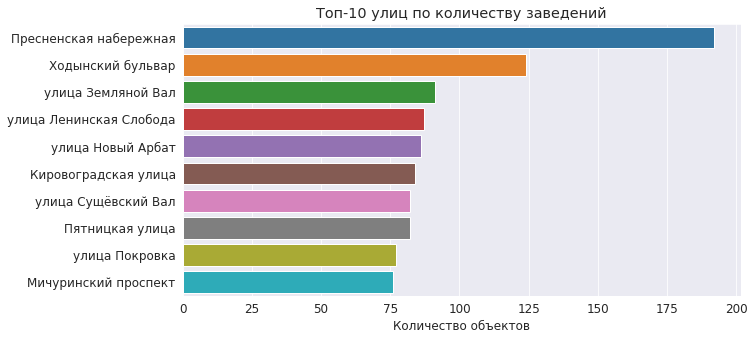

In [17]:
# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='street', data=all_street_top_10)  
plt.ylabel('')
plt.xlabel('Количество объектов')
plt.title("Топ-10 улиц по количеству заведений")
plt.show()

По графику видно, что даже среди топ-10 есть фавориты: Пресненская набережная и Ходынский бульвар.

# 3.7 Исследование улиц с одним заведением

In [18]:
# Создание датасета, содержащем улицы с 1 заведением
street_with_1 = rest_data.groupby('street', as_index=False)['object_type'].agg('count')
street_with_1.columns = ['street','count']
street_with_1 = street_with_1[street_with_1['count'] == 1]
# Подсчет количества улиц с 1 заведением
street_with_1['street'].count()

547

In [19]:
# Соответствие каждой улице районов и округов, через которые проходят улицы
street_with_1 = (street_with_1.merge(district_data, on='street').drop_duplicates()
            .reset_index(drop=True))#.groupby(['admarea', 'district'], as_index=False)['street'].agg('count'))
display(street_with_1.head(10))

,street,count,admarea,district
0,1-й Басманный переулок,1,Центральный административный округ,Красносельский район
1,1-й Ботанический проезд,1,Северо-Восточный административный округ,район Свиблово
2,1-й Голутвинский переулок,1,Центральный административный округ,район Якиманка
3,1-й Кирпичный переулок,1,Восточный административный округ,район Соколиная Гора
4,1-й Кожевнический переулок,1,Южный административный округ,Даниловский район
5,1-й Коптельский переулок,1,Центральный административный округ,Красносельский район
6,1-й Котельнический переулок,1,Центральный административный округ,Таганский район
7,1-й Краснокурсантский проезд,1,Юго-Восточный административный округ,район Лефортово
8,1-й Лучевой просек,1,Восточный административный округ,район Сокольники
9,1-й Люсиновский переулок,1,Центральный административный округ,район Замоскворечье


In [20]:
# Создание датасета, содержащем улицы с 1 заведением
all_street_with_1 = all_data.groupby('street', as_index=False)['typeobject'].agg('count')
all_street_with_1.columns = ['street','count']
all_street_with_1 = all_street_with_1[all_street_with_1['count'] == 1]
# Подсчет улиц
all_street_with_1['street'].count()

495

In [21]:
# Объединение с датасетом, содержащим районы
all_street_with_1 = all_street_with_1.merge(district_data, on='street').drop_duplicates().reset_index(drop=True)
all_street_with_1.head(10)

,street,count,admarea,district
0,1-й Басманный переулок,1,Центральный административный округ,Красносельский район
1,1-й Ботанический проезд,1,Северо-Восточный административный округ,район Свиблово
2,1-й Голутвинский переулок,1,Центральный административный округ,район Якиманка
3,1-й Грайвороновский проезд,1,Юго-Восточный административный округ,район Текстильщики
4,1-й Дербеневский переулок,1,Южный административный округ,Даниловский район
5,1-й Кирпичный переулок,1,Восточный административный округ,район Соколиная Гора
6,1-й Кожевнический переулок,1,Южный административный округ,Даниловский район
7,1-й Коптельский переулок,1,Центральный административный округ,Красносельский район
8,1-й Котельнический переулок,1,Центральный административный округ,Таганский район
9,1-й Котляковский переулок,1,Южный административный округ,район Москворечье-Сабурово


In [22]:
# Группировка по округам, где больше всего улиц с 1 заведением
area_with_1 = all_street_with_1.groupby('admarea', as_index=False)['street'].agg('count')
area_with_1.sort_values('street', ascending=False)

,admarea,street
8,Центральный административный округ,157
5,Северо-Восточный административный округ,58
0,Восточный административный округ,56
9,Юго-Восточный административный округ,52
4,Северный административный округ,44
1,Западный административный округ,34
11,Южный административный округ,33
6,Северо-Западный административный округ,31
10,Юго-Западный административный округ,21
3,Новомосковский административный округ,5


Больше всего свободных улиц в ЦАО, теперь можно посмотреть районы ЦАО, где больше всего свободных улиц.

In [23]:
# display(street_with_1[street_with_1['admarea']=='Центральный административный округ'])
cao_region = (all_street_with_1[all_street_with_1['admarea']=='Центральный административный округ']
              .groupby('district', as_index=False)['street'].agg('count'))
cao_region.sort_values('street', ascending=False)

,district,street
4,Таганский район,27
8,район Хамовники,23
3,Пресненский район,20
5,Тверской район,20
0,Басманный район,19
1,Красносельский район,11
2,Мещанский район,10
9,район Якиманка,10
6,район Арбат,9
7,район Замоскворечье,8


Районы с самым большим числом свободных улиц: Таганский, Хамовники, Пресненский.

# 3.8 Исследование распределения количества мест для улиц с большим количеством заведений

[138.2 200.  300. ]


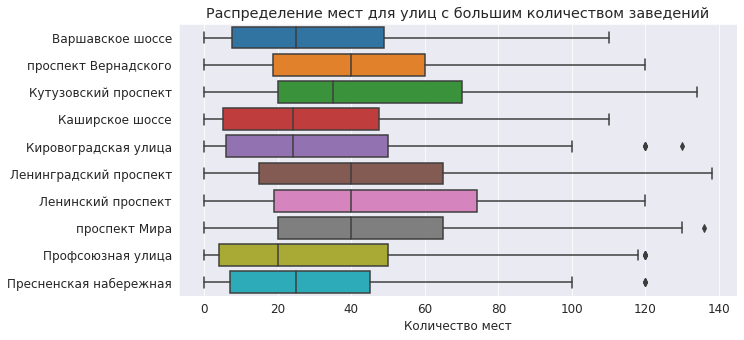

In [24]:
# Поиск в общем датасете ресторанов, которые находятся на топовых улицах
rest_dist = rest_data[rest_data['street'].isin(street_top_10['street'])]

# Вывод персентилей, чтобы немного отфильтровать данные для графика
print(np.percentile(rest_dist['number'], [90, 95, 99]))

# Построение графика
plt.figure(figsize=(10, 5))
sns.boxplot(data=rest_dist[rest_dist['number'] < 140], y='street', x='number') 
plt.ylabel('')
plt.xlabel('Количество мест')
plt.title("Распределение мест для улиц с большим количеством заведений")
plt.show()

По графику можно сказать, что на "топовых" улицах преобладают заведения с малым числом мест, самое высокое медианное значение ~40 мест.

[119.4  160.   297.01]


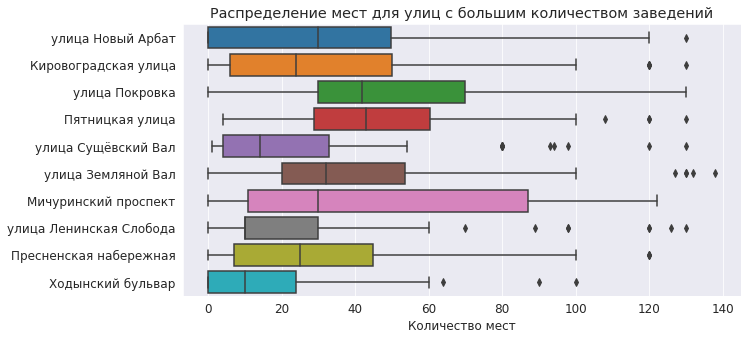

In [25]:
# Поиск в общем датасете ресторанов, которые находятся на топовых улицах
rest_dist = rest_data[rest_data['street'].isin(all_street_top_10['street'])]

# Вывод персентилей, чтобы немного отфильтровать данные для графика
print(np.percentile(rest_dist['number'], [90, 95, 99]))

# Построение графика
plt.figure(figsize=(10, 5))
sns.boxplot(data=rest_dist[rest_dist['number'] < 140], y='street', x='number') 
plt.ylabel('')
plt.xlabel('Количество мест')
plt.title("Распределение мест для улиц с большим количеством заведений")
plt.show()

По графику можно сказать, что на "топовых" улицах преобладают заведения с малым числом мест, самое высокое медианное значение ~40 мест.

# Часть 4. Подведение итогов
# 4.1 Общие выводы по работе

В качестве типа открываемого заведения стоит выбрать кафе или предприятие быстрого обслуживания (QSR). Кафе стоит рассматривать т.к. это наиболее распространенный вид заведений в целом, к тому же можно развить небольшую сеть, если же упор на сетевое развитие, то стоит открыть QSR (типа mcdonald's), к тому при должной настройке роботы позволят быстро обслуживать клиентов.<br>
В среднем стоит ориентироваться на 40 посадочных мест в открываемом заведении.<br> 
Заведение стоит открыть в одном из следующих районов центрального административного округа: Таганский, Хамовники или Пресненский, при этом стоит обратить внимание на улицы с малым числом заведений.  Можно провести дополнительное исследование по посещаемости людей того или иного района, чтобы точнее выбрать место для кафе. <br>